In [3]:
from keras.models import Sequential
from keras.layers import Dense, Activation,LeakyReLU, BatchNormalization
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
# Read the data
# 1- Simulated Time Series
dataset = pd.read_csv('Simulated_Data.csv', index_col=[0])

# 2- Beijing PM2.5 Data Data Set 
# 2.1- Hourly data
#dataset = pd.read_csv('Beijing_hourly.csv', index_col=['date'])

# 2.2- Daily resampled data
#dataset = pd.read_csv('Beijing_daily.csv')

dataset = dataset.values

In [34]:
#idx_interest_var = 2 # gives the column index of the series in the data {0, 1, 2,..., n_feature-1}
#data = dataset[:,idx_interest_var] # choose the time sereis of interest from dataset
n_input = 20
n_out = 1
skip = 20


def split_to_supervised(data, n_input, n_out):
    X = []
    y = []
    T = data.shape[0]
    for i in range(T - n_input):
        X.append(data[i: i + n_input])
        y.append(data[i + n_input])

    # idx = 0
    # while idx <= T - n_input:
    #     X.append(data[idx: idx + n_input])
    #     y.append(data[idx + n_input])
    #     idx += skip
    
    X = np.array(X)
    y = np.array(y)
    
    split_ratio = 0.7
    t_split = np.int(np.floor(split_ratio * X.shape[0]))
    # train
    X_tr = X[:t_split]
    y_tr = y[:t_split]
    #test
    X_te = X[t_split:]
    y_te = y[t_split:]
    return X_tr, y_tr, X_te, y_te

def build_model(data, n_input, n_out=1):
    # prepare data
    train_x, train_y, _, _ = split_to_supervised(data, n_input, n_out)
    # create model
    model = Sequential()
    model.add(BatchNormalization())

    model.add(Dense(100, input_dim= n_input))
    model.add(LeakyReLU(alpha=0.1))
    model.add(BatchNormalization())

    model.add(Dense(1,))
    model.compile(loss='mean_squared_error', optimizer='RMSprop')
    # Fit the model
    model.fit(train_x, train_y, epochs=100, batch_size=20)
    
    return model, train_x, train_y

def evaluate(data, n_input, n_out, model):
    # prepare data
    _, _,test_x, test_y = split_to_supervised(data, n_input, n_out)
    y_hat = model.predict(test_x)
    score = model.evaluate(test_x, test_y)
    return score, test_x, test_y, y_hat


In [36]:
score_list = []
y_hat_list = []
test_y_list = []
for idx_interest_var in range(dataset.shape[1]):
    data = dataset[:,idx_interest_var]
    m, train_x, train_y = build_model(data, n_input, n_out)
    score, test_x, test_y, y_hat = evaluate(data, n_input, n_out, m)
    score_list.append(score)
    y_hat_list.append(y_hat)
    test_y_list.append(test_y)

Epoch 1/100
686/686 [==============================] - 3s 4ms/step - loss: 21.6540 - mean_squared_error: 21.6540
Epoch 2/100
686/686 [==============================] - 0s 356us/step - loss: 16.1856 - mean_squared_error: 16.1856
Epoch 3/100
686/686 [==============================] - 0s 327us/step - loss: 11.7153 - mean_squared_error: 11.7153
Epoch 4/100
686/686 [==============================] - 0s 312us/step - loss: 8.0161 - mean_squared_error: 8.0161
Epoch 5/100
686/686 [==============================] - 0s 348us/step - loss: 4.9164 - mean_squared_error: 4.9164
Epoch 6/100
686/686 [==============================] - 0s 345us/step - loss: 2.7612 - mean_squared_error: 2.7612
Epoch 7/100
686/686 [==============================] - 0s 356us/step - loss: 2.3248 - mean_squared_error: 2.3248
Epoch 8/100
686/686 [==============================] - 0s 345us/step - loss: 2.0689 - mean_squared_error: 2.0689
Epoch 9/100
686/686 [==============================] - 0s 373us/step - loss: 2.1904 - mean_s

686/686 [==============================] - 0s 264us/step - loss: 1.5965 - mean_squared_error: 1.5965
Epoch 72/100
686/686 [==============================] - 0s 327us/step - loss: 1.8321 - mean_squared_error: 1.8321
Epoch 73/100
686/686 [==============================] - 0s 347us/step - loss: 1.4476 - mean_squared_error: 1.4476
Epoch 74/100
686/686 [==============================] - 0s 319us/step - loss: 1.4845 - mean_squared_error: 1.4845
Epoch 75/100
686/686 [==============================] - 0s 353us/step - loss: 1.4170 - mean_squared_error: 1.4170
Epoch 76/100
686/686 [==============================] - 0s 351us/step - loss: 1.6988 - mean_squared_error: 1.6988
Epoch 77/100
686/686 [==============================] - 0s 388us/step - loss: 1.7634 - mean_squared_error: 1.7634
Epoch 78/100
686/686 [==============================] - 0s 382us/step - loss: 1.6517 - mean_squared_error: 1.6517
Epoch 79/100
686/686 [==============================] - 0s 334us/step - loss: 1.5005 - mean_squared_e

686/686 [==============================] - 0s 222us/step - loss: 1.2996 - mean_squared_error: 1.2996
Epoch 43/100
686/686 [==============================] - 0s 229us/step - loss: 1.2654 - mean_squared_error: 1.2654
Epoch 44/100
686/686 [==============================] - 0s 248us/step - loss: 1.2877 - mean_squared_error: 1.2877
Epoch 45/100
686/686 [==============================] - 0s 270us/step - loss: 1.1416 - mean_squared_error: 1.1416
Epoch 46/100
686/686 [==============================] - 0s 363us/step - loss: 1.2317 - mean_squared_error: 1.2317
Epoch 47/100
686/686 [==============================] - 0s 456us/step - loss: 1.2221 - mean_squared_error: 1.2221
Epoch 48/100
686/686 [==============================] - 0s 385us/step - loss: 1.1128 - mean_squared_error: 1.1128
Epoch 49/100
686/686 [==============================] - 0s 373us/step - loss: 1.1797 - mean_squared_error: 1.1797
Epoch 50/100
686/686 [==============================] - 0s 246us/step - loss: 1.2231 - mean_squared_e

686/686 [==============================] - 0s 313us/step - loss: 647.5690 - mean_squared_error: 647.5690
Epoch 14/100
686/686 [==============================] - 0s 366us/step - loss: 565.0848 - mean_squared_error: 565.0848
Epoch 15/100
686/686 [==============================] - 0s 481us/step - loss: 589.5072 - mean_squared_error: 589.5072
Epoch 16/100
686/686 [==============================] - 0s 376us/step - loss: 715.9582 - mean_squared_error: 715.9582
Epoch 17/100
686/686 [==============================] - 0s 485us/step - loss: 631.1901 - mean_squared_error: 631.1901
Epoch 18/100
686/686 [==============================] - 0s 450us/step - loss: 635.3218 - mean_squared_error: 635.3218
Epoch 19/100
686/686 [==============================] - 0s 327us/step - loss: 631.5176 - mean_squared_error: 631.5176
Epoch 20/100
686/686 [==============================] - 0s 321us/step - loss: 622.0523 - mean_squared_error: 622.0523
Epoch 21/100
686/686 [==============================] - 0s 372us/step

686/686 [==============================] - 0s 299us/step - loss: 607.2402 - mean_squared_error: 607.2402
Epoch 83/100
686/686 [==============================] - 0s 327us/step - loss: 594.0113 - mean_squared_error: 594.0113
Epoch 84/100
686/686 [==============================] - 0s 402us/step - loss: 628.6036 - mean_squared_error: 628.6036
Epoch 85/100
686/686 [==============================] - 0s 369us/step - loss: 637.0839 - mean_squared_error: 637.0839
Epoch 86/100
686/686 [==============================] - 0s 379us/step - loss: 600.7760 - mean_squared_error: 600.7760
Epoch 87/100
686/686 [==============================] - 0s 366us/step - loss: 563.6268 - mean_squared_error: 563.6268
Epoch 88/100
686/686 [==============================] - 0s 370us/step - loss: 546.4109 - mean_squared_error: 546.4109
Epoch 89/100
686/686 [==============================] - 0s 350us/step - loss: 590.8470 - mean_squared_error: 590.8470
Epoch 90/100
686/686 [==============================] - 0s 458us/step

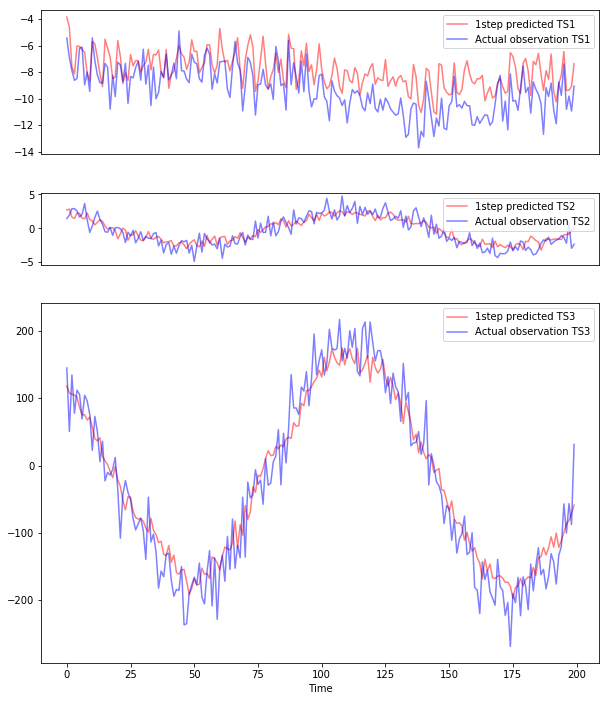

In [46]:
f, (a0, a1, a2) = plt.subplots(3,1, gridspec_kw = {'height_ratios':[2, 1,5]}, figsize=(10, 12))
a0.plot(y_hat_list[0][-200:], 'r', test_y_list[0][-200:], 'b',alpha = 0.5)
a0.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
a0.legend(['1step predicted TS1', 'Actual observation TS1' ])

a1.plot(y_hat_list[1][-200:], 'r', test_y_list[1][-200:], 'b',alpha = 0.5)
a1.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
a1.legend(['1step predicted TS2', 'Actual observation TS2' ])

a2.plot(y_hat_list[2][-200:], 'r', test_y_list[2][-200:], 'b',alpha = 0.5)
a2.legend(['1step predicted TS3', 'Actual observation TS3' ])
a2.set_xlabel('Time');
plt.savefig(r'C:\Users\Javad\Dropbox\McGill ECON MA and PhD\2018\9- Fall 2018\1- ECON 706- Machine Learning\Project\Pics\1step_predict_FF_sim')


In [43]:
score_list

[[2.73219907932541, 2.73219907932541],
 [1.3399056009694832, 1.3399056009694832],
 [1223.294264190051, 1223.294264190051]]